In [13]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA

from asteria.simulation import Simulation
from analysis import *
from plthelper import *


import matplotlib.pyplot as plt

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


In [14]:
add_wls = True
detector_scope = "Gen2"

trials = 10000
distance = 10*u.kpc
frequency = 80*u.Hz # 50 Hz and 400 Hz, in steps of 50 Hz
amplitude = 0.2 # 1% and 50% in log steps (1%, 2%, 5%, 10%, 20%, 50%)
time_start = 150*u.ms
time_end = 300*u.ms
position = "center"

sim_dt = 1 * u.ms
res_dt = 1 * u.ms
time_win = [0, 100] * u.s # time independent
freq_res = 1 * u.Hz 
freq_win = [75, 1E6] * u.Hz # freq independent
hanning = False

temp_para = {"frequency": frequency, 
             "amplitude": amplitude, #in percent of max value
             "time_start": time_start,
             "time_end": time_end,
             "position": position}

fft_para = {"time_res": res_dt, 
             "time_win": time_win,
             "freq_res": time_start,
             "freq_win": freq_win,
             "hanning": hanning}


model = {'name': 'Sukhbold_2015',
         'param':{
             'progenitor_mass': 27*u.Msun, 
             'eos': 'LS220'}
        }

sim = Simulation(model=model,
                 distance=10*u.kpc, 
                 res_dt=res_dt,
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=0.000*u.s, tmax=1*u.s, dt=sim_dt,
                 hierarchy = 'normal',
                 mixing_scheme = 'NoTransformation',
                 detector_scope = detector_scope,
                 add_wls = add_wls)
sim.run()

In [17]:
# Initialize analysis class and run analysis
ana = Analysis(sim, res_dt = res_dt, distance=distance, trials = trials, temp_para=temp_para)
ana.run(mode = "FFT", ft_para = fft_para, model = "generic")

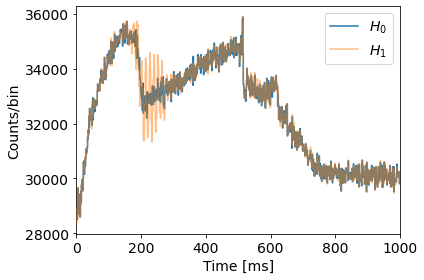

In [38]:
plot_hits(ana._time_new, ana._comb, det = "wls")

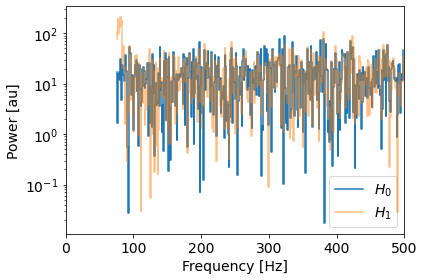

In [6]:
plot_fft(ana._freq_new, ana._fft)

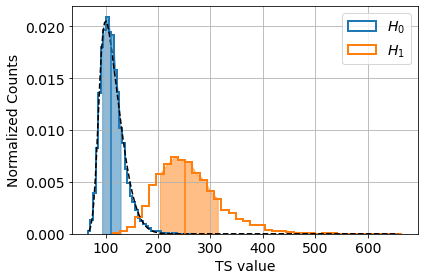

In [7]:
plot_ts(ana.ts)

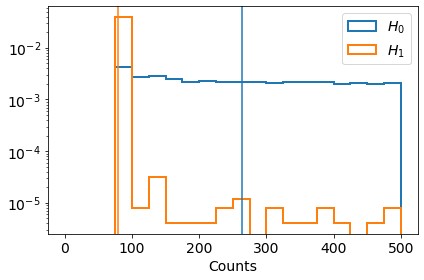

In [8]:
plot_fit_freq(ana.ffit)

In [9]:
dist_range = np.arange(2,30,2) * u.kpc
Zscore, Ts_stat = ana.dist_scan(dist_range, mode = "FFT", ft_para = fft_para, model = "generic")

Distance: 2.0 kpc
Distance: 4.0 kpc
Distance: 6.0 kpc
Distance: 8.0 kpc
Distance: 10.0 kpc
Distance: 12.0 kpc
Distance: 14.0 kpc
Distance: 16.0 kpc
Distance: 18.0 kpc
Distance: 20.0 kpc
Distance: 22.0 kpc
Distance: 24.0 kpc
Distance: 26.0 kpc
Distance: 28.0 kpc


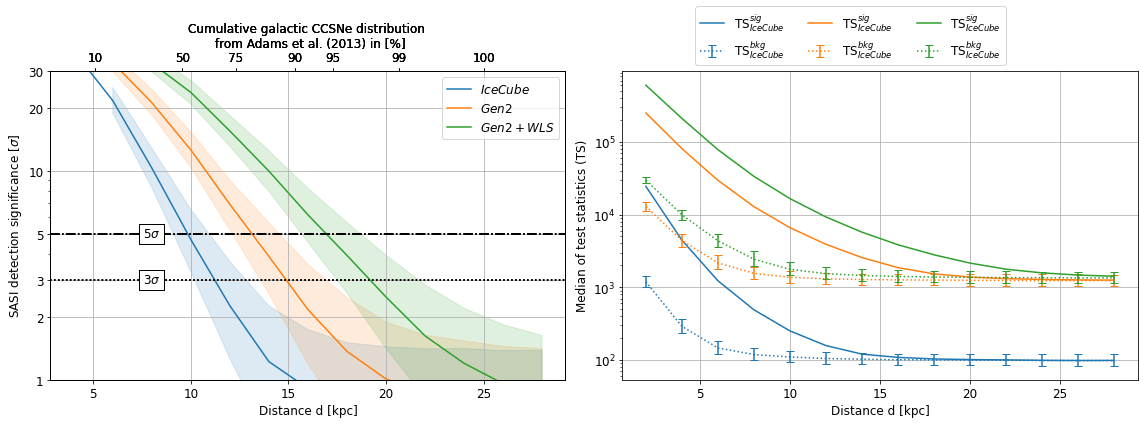

In [10]:
plot_significance(dist_range, Zscore, Ts_stat)